<h1> Dimensionality Reduction </h1>

In a unit square, the distance between 2 points is roughly 0.52 units, in a 3D unit cube, the distance is on average 0.66. In a 1,000,000 dimensional unit hypercube, the distance is 408.25. Hence as dimensions increase the distance between any 2 points greatly increases too. Hence what this means is that in a large dataset of high dimensions, the distance between any 2 points is much greater. 

A possible solution is to increase the number of training instances such that it reaches sufficient density of training instances. However the number of instances required to reach sufficient density increases exponentially as the dimensions increase.

<h3> Main approaches for dimensionality reduction </h3>

<h4>Projection</h4>

In real world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant while others are highly correlated. Hence most training instances actually lie within a much lower dimensional subspace. 

<IPython.core.display.Javascript object>


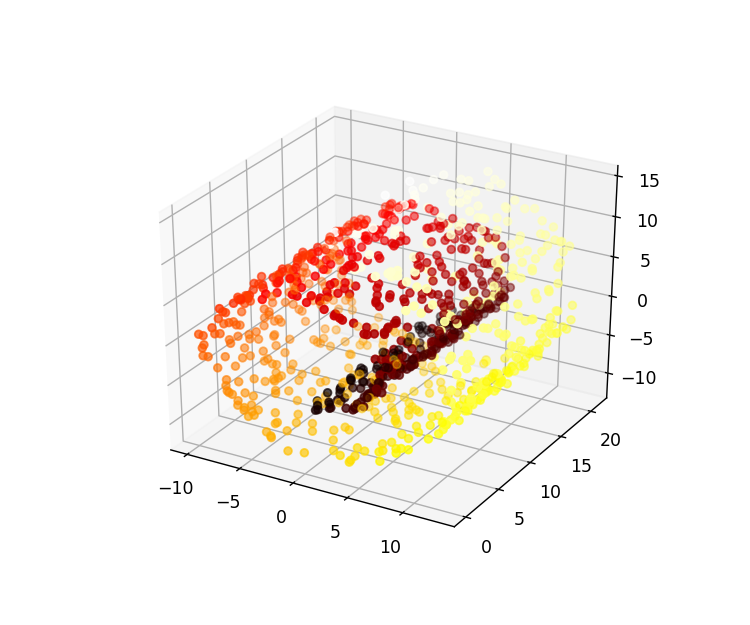

In [5]:
%matplotlib notebook
from sklearn.datasets import make_swiss_roll
X,t = make_swiss_roll(n_samples = 1000,noise = 0.2, random_state = 42)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(X[:,0],X[:,1],X[:,2], c = t,cmap = plt.cm.hot)
plt.show()

In reducing dimensionality of the above dataset, we should no squash it to have the 1st and 2nd dimensions only, however we should unroll this swissroll.

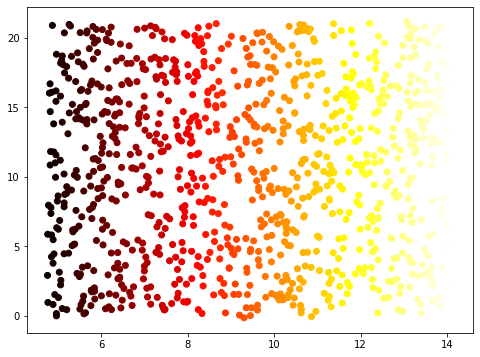

In [8]:
%matplotlib inline
plt1 = plt.figure(figsize = (8,6))
ax1 = plt1.add_subplot(111)
ax1.scatter(t, X[:,1],c= t, cmap = plt.cm.hot)

<h3> Manifold Learning </h3>

A manifold is a d-dimensional shape which belongs to a n-dimensional shape where d<n. Many dimensionality reduction algorithms work by modelling the manifold on which the training instances lie. This is called manifold learning. The *Manifold Hypothesis* states that most real-world high-dimensional datasets lie close to a much lower-dimesnional manifold.

Manifold Learning: Means that many dimensional reduction algorithms give you the manifolds which are of a lower dimension on which the training instances lie. 

Furthermore, the manifold assumption is often accompanied by another assumption that the **task at hand will be simpler if expressed in a lower dimension of the manifold.**

While reducing the dimensionality can increase the ease of finding a decision boundary, it is not always the case. Hence while reducing dimensionality, although speed of training is increased, the decision boundary is not always the best. 

<h1> PCA </h1> 

PCA identifies the hyperplane that lies closest to the data and then it projects the data onto it. 

However, we need to choose the right hyperplane. We need to select the hyperplane which maintains the most variance. This hyperplane will retain the most amount of information.

In PCA, either you can minimize the distance between the points and their projection, or you can maximize the distance between the origin and the projected points.

In PCA, you first find the axis that maximises the variance and distance between the origin and projected points. After that each principal component is the perpendicular axis. Each n dimensional dataset has n dimensional principal components. 

In [9]:
import numpy as np
m = 60
w1,w2 = 0.1,0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi /2 - 0.5
X = np.empty((m,3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

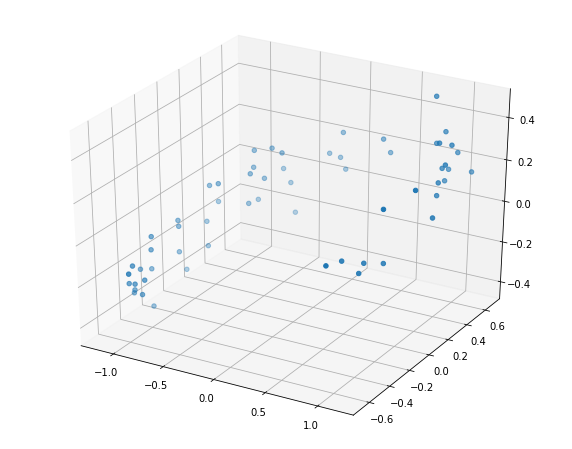

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,8))
ax2 = fig.add_subplot(111,projection = '3d')
ax2.scatter(X[:,0],X[:,1],X[:,2])
plt.show()

In [11]:
#centering the data
X_centered = X - X.mean(axis=0)
U,s,Vt = np.linalg.svd(X_centered)

In [13]:
Vt

array([[ 0.94692216,  0.27214838,  0.17109554],
       [ 0.31016575, -0.91334512, -0.26381416],
       [-0.08447268, -0.30287944,  0.94927784]])

In [14]:
s

array([7.03078594, 2.55595521, 0.69792926])

In [15]:
pc1 = np.transpose(Vt[:,0])
pc2 = np.transpose(Vt[:,1])

PCA assumes that the data is centered, hence we always need to center it if we are not using Scikit learn.

In [31]:
reducedX = np.dot(X_centered,np.transpose(Vt[:2,:]))
reducedX

array([[-1.11842166,  0.20590893],
       [-1.02866847,  0.16391149],
       [-0.45062852, -0.30360097],
       [ 0.68205943,  0.57213326],
       [-0.93755608, -0.06345046],
       [-1.05419165,  0.3537594 ],
       [ 1.08848976, -0.18371059],
       [ 0.64927566,  0.70754074],
       [-1.06378854,  0.24446742],
       [-0.95977266,  0.52894013],
       [-0.9237798 , -0.03740285],
       [-1.00453785,  0.39810138],
       [-1.14313954,  0.29757671],
       [-1.02696543,  0.12940592],
       [-0.46908677, -0.41146083],
       [-0.76193994, -0.24670622],
       [-1.08474532,  0.1373559 ],
       [ 0.82770634,  0.6296785 ],
       [ 1.16033065, -0.20586812],
       [-0.28931261, -0.43376097],
       [ 1.25714642, -0.14947338],
       [ 1.28419439,  0.35835241],
       [-0.22535897, -0.36272535],
       [ 1.1970604 , -0.01989868],
       [-0.45836976, -0.34612567],
       [ 1.37014152, -0.09348211],
       [ 1.20422397,  0.37322345],
       [-0.92721289, -0.00829577],
       [-0.36824261,

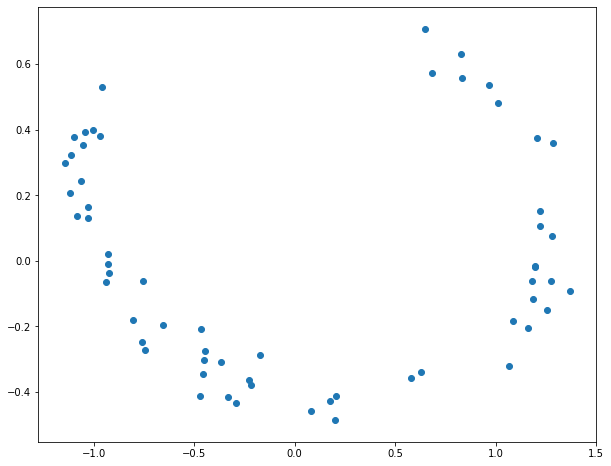

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure(figsize = (10,8))
ax3 = fig1.add_subplot(111)
ax3.scatter(reducedX[:,0],reducedX[:,1])
plt.show()

In [24]:
s/s.sum()

array([0.68361801, 0.24852087, 0.06786112])

The First 2 Principal components represent over 90% of the total variance

In [25]:
W2 = Vt.T[:,:2]
W2

array([[ 0.94692216,  0.31016575],
       [ 0.27214838, -0.91334512],
       [ 0.17109554, -0.26381416]])

In [28]:
np.transpose(Vt[:2,:])

array([[ 0.94692216,  0.31016575],
       [ 0.27214838, -0.91334512],
       [ 0.17109554, -0.26381416]])

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

X2D

array([[-1.11842166,  0.20590893],
       [-1.02866847,  0.16391149],
       [-0.45062852, -0.30360097],
       [ 0.68205943,  0.57213326],
       [-0.93755608, -0.06345046],
       [-1.05419165,  0.3537594 ],
       [ 1.08848976, -0.18371059],
       [ 0.64927566,  0.70754074],
       [-1.06378854,  0.24446742],
       [-0.95977266,  0.52894013],
       [-0.9237798 , -0.03740285],
       [-1.00453785,  0.39810138],
       [-1.14313954,  0.29757671],
       [-1.02696543,  0.12940592],
       [-0.46908677, -0.41146083],
       [-0.76193994, -0.24670622],
       [-1.08474532,  0.1373559 ],
       [ 0.82770634,  0.6296785 ],
       [ 1.16033065, -0.20586812],
       [-0.28931261, -0.43376097],
       [ 1.25714642, -0.14947338],
       [ 1.28419439,  0.35835241],
       [-0.22535897, -0.36272535],
       [ 1.1970604 , -0.01989868],
       [-0.45836976, -0.34612567],
       [ 1.37014152, -0.09348211],
       [ 1.20422397,  0.37322345],
       [-0.92721289, -0.00829577],
       [-0.36824261,

In [35]:
X2D.shape

(60, 2)

<h2>The explained variance ratio</h2>

Indicates the dataset's variance that lies along the axis of each principal component

In [34]:
pca.explained_variance_ratio_

array([0.87564627, 0.11572506])

<h3> Reconstruction </h3> 

In [40]:
X3D_reconstruct = pca.inverse_transform(X2D)
X3D_reconstruct

array([[-1.15964064, -0.35174867, -0.23147648],
       [-1.08767752, -0.28896433, -0.20504059],
       [-0.68532504,  0.29534853,  0.01719587],
       [ 0.65886504, -0.19623986, -0.02003736],
       [-1.07192107, -0.05650831, -0.12947037],
       [-1.05296167, -0.46930708, -0.25949206],
       [ 0.80928606,  0.60471579,  0.24890336],
       [ 0.66982013, -0.32883567, -0.06136893],
       [-1.0959478 , -0.37209756, -0.23230127],
       [-0.90921917, -0.60361157, -0.28955255],
       [-1.05079693, -0.07654958, -0.13398504],
       [-0.99219002, -0.49629341, -0.26269456],
       [-1.15461435, -0.44219992, -0.25988886],
       [-1.09676733, -0.25698535, -0.19564615],
       [-0.736258  ,  0.38883842,  0.0424927 ],
       [-0.96246592,  0.15866109, -0.05107777],
       [-1.14901457, -0.27997113, -0.20762935],
       [ 0.81462989, -0.20916095, -0.01029908],
       [ 0.87044128,  0.64450464,  0.26704048],
       [-0.5729426 ,  0.45813139,  0.07913435],
       [ 0.97961   ,  0.61934503,  0.268

In [43]:
#reconstruction error 

np.mean(np.sum(np.square(X3D_reconstruct - X),axis = 1))

0.008118420891773568

In [44]:
Vt

array([[ 0.94692216,  0.27214838,  0.17109554],
       [ 0.31016575, -0.91334512, -0.26381416],
       [-0.08447268, -0.30287944,  0.94927784]])

In [45]:
np.dot(np.transpose(Vt[:2,:]),Vt[:2,:])

array([[ 0.99286437, -0.02558504,  0.08018804],
       [-0.02558504,  0.90826404,  0.28751674],
       [ 0.08018804,  0.28751674,  0.09887159]])

In [46]:
np.dot(Vt[:2,:],np.transpose(Vt[:2,:]))

array([[1.00000000e+00, 1.01591529e-17],
       [1.01591529e-17, 1.00000000e+00]])

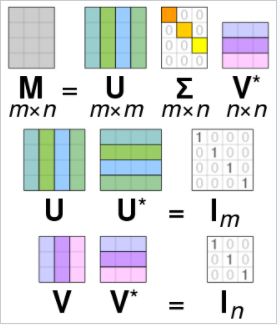

In [47]:
np.dot(X2D,Vt[:2,:])

array([[-9.95192359e-01, -4.92442564e-01, -2.45678647e-01],
       [-9.23229237e-01, -4.29658217e-01, -2.19242756e-01],
       [-5.20876754e-01,  1.54654642e-01,  2.99370470e-03],
       [ 8.23313324e-01, -3.36933752e-01, -3.42395287e-02],
       [-9.07472790e-01, -1.97202202e-01, -1.43672533e-01],
       [-8.88513390e-01, -6.10000970e-01, -2.73694225e-01],
       [ 9.73734343e-01,  4.64021900e-01,  2.34701196e-01],
       [ 8.34268408e-01, -4.69529557e-01, -7.55710936e-02],
       [-9.31499520e-01, -5.12791450e-01, -2.46503437e-01],
       [-7.44770890e-01, -7.44305459e-01, -3.03754713e-01],
       [-8.86348646e-01, -2.17243466e-01, -1.48187200e-01],
       [-8.27741741e-01, -6.36987300e-01, -2.76896723e-01],
       [-9.90166062e-01, -5.82893812e-01, -2.74091024e-01],
       [-9.32319043e-01, -3.97679244e-01, -2.09848316e-01],
       [-5.71809716e-01,  2.48144533e-01,  2.82905372e-02],
       [-7.98017635e-01,  1.79671976e-02, -6.52799319e-02],
       [-9.84566286e-01, -4.20665020e-01

In [48]:
X_centered

array([[-0.99504599, -0.49191774, -0.24732354],
       [-0.92857246, -0.4488165 , -0.15919731],
       [-0.5136687 ,  0.18049935, -0.0780082 ],
       [ 0.82510773, -0.33049985, -0.05440452],
       [-0.91191797, -0.21314053, -0.09371898],
       [-0.89803559, -0.6441431 , -0.16668673],
       [ 0.97134135,  0.45544176,  0.26159288],
       [ 0.82945268, -0.48679652, -0.02145337],
       [-0.9146636 , -0.45242573, -0.43570031],
       [-0.75976428, -0.79806473, -0.13526363],
       [-0.8892636 , -0.22769513, -0.11542984],
       [-0.82534984, -0.62841106, -0.30377618],
       [-0.98450446, -0.56259396, -0.33771434],
       [-0.94190838, -0.4320621 , -0.10208635],
       [-0.58215315,  0.21105781,  0.14452689],
       [-0.80571431, -0.00962948,  0.02121295],
       [-0.97987899, -0.40385858, -0.27450588],
       [ 0.98546006, -0.32697239, -0.0962189 ],
       [ 1.02950357,  0.48449911,  0.31336443],
       [-0.40609316,  0.32604692,  0.03794875],
       [ 1.14665172,  0.48795   ,  0.225

Hence the result of U,s,Vt = np.linalg.svd(X_centered) is such that V * Vt gives identity matrix and U * Ut gives identity matrix. 

Because they are orthonormal bases, in that the columns are orthogonal to each other. 

<h2> Choosing the right number of dimensions </h2>

In [53]:
pca = PCA()
pca.fit(X_centered)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95) + 1
d

2

Now set the n_components = 2 and run PCA again. 

Else you will set n_components to between 0 and 1, where n_components means the ratio of variance that will be preserved. 

In [57]:
pca2 = PCA(n_components = 0.95)
X_reduced = pca2.fit_transform(X)
X_reduced

array([[-1.11842166,  0.20590893],
       [-1.02866847,  0.16391149],
       [-0.45062852, -0.30360097],
       [ 0.68205943,  0.57213326],
       [-0.93755608, -0.06345046],
       [-1.05419165,  0.3537594 ],
       [ 1.08848976, -0.18371059],
       [ 0.64927566,  0.70754074],
       [-1.06378854,  0.24446742],
       [-0.95977266,  0.52894013],
       [-0.9237798 , -0.03740285],
       [-1.00453785,  0.39810138],
       [-1.14313954,  0.29757671],
       [-1.02696543,  0.12940592],
       [-0.46908677, -0.41146083],
       [-0.76193994, -0.24670622],
       [-1.08474532,  0.1373559 ],
       [ 0.82770634,  0.6296785 ],
       [ 1.16033065, -0.20586812],
       [-0.28931261, -0.43376097],
       [ 1.25714642, -0.14947338],
       [ 1.28419439,  0.35835241],
       [-0.22535897, -0.36272535],
       [ 1.1970604 , -0.01989868],
       [-0.45836976, -0.34612567],
       [ 1.37014152, -0.09348211],
       [ 1.20422397,  0.37322345],
       [-0.92721289, -0.00829577],
       [-0.36824261,

In [58]:
U1,s,Vt1 = np.linalg.svd(X_centered)


In [63]:
np.dot(X_centered,np.transpose(Vt1))

array([[-1.11842166,  0.20590893, -0.00173278],
       [-1.02866847,  0.16391149,  0.06325382],
       [-0.45062852, -0.30360097, -0.08533003],
       [ 0.68205943,  0.57213326, -0.02124246],
       [-0.93755608, -0.06345046,  0.05262269],
       [-1.05419165,  0.3537594 ,  0.11272516],
       [ 1.08848976, -0.18371059,  0.02832857],
       [ 0.64927566,  0.70754074,  0.05700936],
       [-1.06378854,  0.24446742, -0.19930611],
       [-0.95977266,  0.52894013,  0.17749396],
       [-0.9237798 , -0.03740285,  0.03450767],
       [-1.00453785,  0.39810138, -0.02831569],
       [-1.14313954,  0.29757671, -0.06702286],
       [-1.02696543,  0.12940592,  0.11351994],
       [-0.46908677, -0.41146083,  0.12244713],
       [-0.76193994, -0.24670622,  0.09111441],
       [-1.08474532,  0.1373559 , -0.05548888],
       [ 0.82770634,  0.6296785 , -0.07554971],
       [ 1.16033065, -0.20586812,  0.06376016],
       [-0.28931261, -0.43376097, -0.02842523],
       [ 1.25714642, -0.14947338, -0.030

In [64]:
s

array([7.03078594, 2.55595521, 0.69792926])

In [69]:
np.where(np.cumsum(s/s.sum())>0.9)[0][0] + 1

2